In [1]:
import os
import subprocess
# os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

# VDX_dir = '/home/alexi/Documents/ValDX'

VDX_dir = "/home/alexi/Documents/ValDX/"

import sys
sys.path.append(VDX_dir)

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

/home/alexi/Documents/interpretable-hdxer/notebooks/Figure-4_Cluster_Sweep_Ensembles_Compare


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
results_dir ="/home/alexi/Documents/interpretable-hdxer/data/fig4/Sweep-Clusters"

# results_dir = '/home/alexi/Documents/ValDX/results/Sweep-Methods/'

# results_dir = "/home/alexi/Documents/ValDX/results/Find-Clusters2"
csvs = glob.glob(results_dir + '/**/*.csv', recursive=True)
csvs = [csv for csv in csvs if 'HOIP' in csv]

print(len(csvs))


14


In [3]:
pkls = glob.glob(results_dir + '/**/*.pkl', recursive=True)
pkls = [pkl for pkl in pkls if 'HOIP' in pkl]

print(len(pkls))

print(len(pkls))

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

import pickle

# load all the pkls
pkl_list = []
for pkl in pkls:
    with open(pkl, 'rb') as f:
        pkl_list.append(pickle.load(f))


# merge all the pkls
pkl_list = merge_AnalysisData_classes(pkl_list)



14
14
Merging AnalysisData classes
['train_dfs', 'val_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'HDX_data', 'weights', 'features', 'BV_constants', 'LogPfs', 'analysis_df']


In [4]:
def extract_protein_name(pkl_list:dict, protein_names: list):
    """
    Extracts the protein name from the name in the dictionary of pandas dataframes
    """

    for key, df in pkl_list.items():
        # iterate through the rows
        for i, row in df.iterrows():
            # print(row["name"])
            # iterate through the protein names
            for protein_name in protein_names:
                # check if the protein name is in the row name
                if protein_name in row["name"]:
                    print(i, protein_name)
                    # if it is, set the protein name to the protein name
                    row["protein"] = protein_name
            df.loc[i] = row
        
        pkl_list[key] = df

                    
    return pkl_list

protein_names = ["HOIP", "HOIP", "BRD4", "LXRa", "MBP"]

pkl_list = extract_protein_name(pkl_list, protein_names)
        
pkl_list["analysis_df"]



0 HOIP
0 HOIP
1 HOIP
1 HOIP
2 HOIP
2 HOIP
3 HOIP
3 HOIP
4 HOIP
4 HOIP
5 HOIP
5 HOIP
6 HOIP
6 HOIP
7 HOIP
7 HOIP
8 HOIP
8 HOIP
9 HOIP
9 HOIP
10 HOIP
10 HOIP
11 HOIP
11 HOIP
12 HOIP
12 HOIP
13 HOIP
13 HOIP
14 HOIP
14 HOIP
15 HOIP
15 HOIP
16 HOIP
16 HOIP
17 HOIP
17 HOIP
18 HOIP
18 HOIP
19 HOIP
19 HOIP
20 HOIP
20 HOIP
21 HOIP
21 HOIP
22 HOIP
22 HOIP
23 HOIP
23 HOIP
24 HOIP
24 HOIP
25 HOIP
25 HOIP
26 HOIP
26 HOIP
27 HOIP
27 HOIP
28 HOIP
28 HOIP
29 HOIP
29 HOIP
30 HOIP
30 HOIP
31 HOIP
31 HOIP
32 HOIP
32 HOIP
33 HOIP
33 HOIP
34 HOIP
34 HOIP
35 HOIP
35 HOIP
36 HOIP
36 HOIP
37 HOIP
37 HOIP
38 HOIP
38 HOIP
39 HOIP
39 HOIP
40 HOIP
40 HOIP
41 HOIP
41 HOIP
42 HOIP
42 HOIP
43 HOIP
43 HOIP
44 HOIP
44 HOIP
45 HOIP
45 HOIP
46 HOIP
46 HOIP
47 HOIP
47 HOIP
48 HOIP
48 HOIP
49 HOIP
49 HOIP
50 HOIP
50 HOIP
51 HOIP
51 HOIP
52 HOIP
52 HOIP
53 HOIP
53 HOIP
54 HOIP
54 HOIP
55 HOIP
55 HOIP
56 HOIP
56 HOIP
57 HOIP
57 HOIP
58 HOIP
58 HOIP
59 HOIP
59 HOIP
60 HOIP
60 HOIP
61 HOIP
61 HOIP
62 HOIP
62 HOIP
63 HOIP
63 H

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.5,Train,0.049486,train_HOIP_af_clean_sweep_0.2_1,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp
1,0.5,Val,0.373401,val_HOIP_af_clean_sweep_0.2_1,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp
2,0.5,Train,0.231617,train_HOIP_af_clean_sweep_0.2_2,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp
3,0.5,Val,0.348599,val_HOIP_af_clean_sweep_0.2_2,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp
4,0.5,Train,0.390283,train_HOIP_af_clean_sweep_0.2_3,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,5.0,Train,NaN,train_HOIP_af_clean_sweep_0.001_2,0.097214,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,RW_bench,R3,HOIP,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,train,train_R3
360,5.0,Train,NaN,train_HOIP_af_clean_sweep_0.001_3,0.150134,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,RW_bench,R3,HOIP,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,train,train_R3
361,5.0,Val,NaN,val_HOIP_af_clean_sweep_0.001_1,0.116788,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,RW_bench,R3,HOIP,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,val,val_R3
362,5.0,Val,NaN,val_HOIP_af_clean_sweep_0.001_2,0.148834,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,RW_bench,R3,HOIP,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,val,val_R3


In [5]:
def transform_naming(df):
    """
    Transform complex naming patterns in DataFrame to standardized ensemble categories.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing 'name' column with patterns like
                      'MBP_10Start_RW_bench_R3_k_sequence'
    
    Returns:
    pd.DataFrame: DataFrame with transformed naming columns
    """
    df = df.copy()
    
    # Extract method and fit from name
    df["protein"] = df["name"].apply(lambda x: x.split("_")[0])
    df["method"] = df["name"].apply(lambda x: x.split("_")[6])

    df["fit"] = df["name"].apply(lambda x: x.split("_")[3])
    

    # Initialize ensemble based on the core system type from name
    def determine_ensemble(name):
        parts = name.split("_")
        
        # Check for start conditions
        if "10Start" in name:
            return "10Start"
        if "1Start" in name:
            return "1Start"
            
        # Check for shaw_400
        if "shaw_400" in name:
            return "Shaw_400"
            
        # Check for TFES
        if "TFES" in name:
            return "TFES"
            
        # Check for clean/dirty
        if "clean" in name:
            return "af_clean"
        if "dirty" in name:
            return "af_dirty"
            
        # Default to method if no special case
        return parts[2]
    
    df["ensemble"] = df["name"].apply(determine_ensemble)
    df["c_frac1"] = df["name"].apply(lambda x: x.split("_")[4])
    df["split_type"] = df ["name"].apply(lambda x: x.split("_")[-3])
    df["replicate"] = df["calc_name"].apply(lambda x: x.split("_")[-1])  

    # df["analysis"] = df["name"].apply(lambda x: x.split("_")[3])

    return df

In [6]:
pkl_list["analysis_df"].columns


Index(['time', 'Type', 'R', 'calc_name', 'mse', 'name', 'system', 'analysis',
       'split_type', 'protein', 'name_name', 'dataset', 'class'],
      dtype='object')

In [7]:

data_frames = []

for csv in csvs:
    data_frames.append(pd.read_csv(csv))

df = pd.concat(data_frames)
df.head()

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.5,Train,0.049486,train_HOIP_af_clean_sweep_0.2_1,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,sweep,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp
1,0.5,Val,0.373401,val_HOIP_af_clean_sweep_0.2_1,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,sweep,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp
2,0.5,Train,0.231617,train_HOIP_af_clean_sweep_0.2_2,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,sweep,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp
3,0.5,Val,0.348599,val_HOIP_af_clean_sweep_0.2_2,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,sweep,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp
4,0.5,Train,0.390283,train_HOIP_af_clean_sweep_0.2_3,NaN,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,sweep,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,train,train_Sp


In [8]:
#
df["method"] = df["name"].apply(lambda x: x.split("_")[4])

print(df["method"].unique())    

['0.2' '0.5' '0.001' '0.1' '0.01' '1.0' '0.05']


In [9]:
df["c_frac1"] = df["name"].apply(lambda x: x.split("_")[4])

print(df["c_frac1"].unique())

['0.2' '0.5' '0.001' '0.1' '0.01' '1.0' '0.05']


In [10]:
# protein_names = ["HOIP", "HOIP", "BRD4", "LXR", "MBP"]

df['protein'] = df['name'].apply(lambda x: x.split('_')[0])
# only include df that has non nan mse values
mse_df = df.dropna(subset=["mse"])
val_df = mse_df[mse_df["Type"] == "Val"]

# remove val mse = 0
val_df = val_df[val_df["mse"] != 0]


print(val_df.method.value_counts())

method
0.2      12
0.5      12
0.001    12
0.1      12
0.01     12
1.0      12
0.05     12
Name: count, dtype: int64


In [11]:
merge_df = pkl_list["merge_df"]

merge_df.analysis.value_counts()

analysis
RW_bench    9744
Name: count, dtype: int64

In [12]:
merge_df = pkl_list["merge_df"]
merge_df = transform_naming(merge_df)
def calc_MSE_difference(merge_df:pd.DataFrame, key='mse', prior_dataset='prior', val_dataset='val', exp_dataset="Experimental"):

    # extract only the values that contain the prior dataset
    prior_df = merge_df[merge_df["dataset"]==prior_dataset]

    val_df = merge_df[merge_df["dataset"]==val_dataset]

    exp_df = merge_df[merge_df["dataset"]==exp_dataset]

    systems = prior_df["system"].unique()

    print(len(systems))
    # iterate through the systems

    # create a new dataframe to store the differences
    dMSE_df = pd.DataFrame()

    mean_dMSE_df = pd.DataFrame()

    columns = val_df.columns.tolist()
    print(columns)
    # find all columns that are numbers
    times = [col for col in columns if col != str(col)]

    string_columns = [col for col in columns if col not in times]

    columns_to_remove = ["peptide"]

    final_string_columns = [col for col in string_columns if col not in columns_to_remove]

    # print(times)
    # break


    for system in systems:


        system_prior_df = prior_df[prior_df["system"]==system]
        system_df = val_df[val_df["system"]==system]
        system_exp_df = exp_df[exp_df["system"]==system]
        # print(system_exp_df)

        # break
    # break
        # for each system remove the times that are NaN values to find the valid times for the system
        system_times = [time for time in times if not np.isnan(system_df[time].values).all()]
        print(system_times)

        system_replicates = system_df["replicate"].unique()
        print(system_replicates)
        # break

        for rep in system_replicates:

            system_calc_df = system_df[system_df["replicate"]==rep]
            system_prior_calc_df = system_prior_df[system_prior_df["replicate"]==rep]

            val_peptides = system_calc_df["peptide"].unique()

            system_prior_calc_df = system_prior_calc_df[system_prior_calc_df["peptide"].isin(val_peptides)]

            # system_exp_calc_df = system_exp_df[system_exp_df["replicate"]==rep]

            system_exp_calc_df = system_exp_df[system_exp_df["peptide"].isin(val_peptides)]

            # print(system_exp_calc_df)




            print("system_prior_calc_df")
            print(system_prior_calc_df.peptide.value_counts())
            print("system_calc_df")
            print(system_calc_df.peptide.value_counts())


            df_to_add = system_calc_df.copy()

            for time in system_times:
                print(time)
                print(system_calc_df[time].values)
                print(system_prior_calc_df[time].values)
                # break
                experimental_values = system_exp_calc_df[time].values
                df_to_add[time] = np.abs(system_calc_df[time].values-experimental_values)**2 - np.abs(system_prior_calc_df[time].values-experimental_values)**2

                print(df_to_add[time].values)
                # break


            dMSE_df = pd.concat([dMSE_df, df_to_add])


            # average the dMSE values for each peptide from df_to_add for each system_time
            mean_dMSE = df_to_add.groupby("calc_name")[system_times].mean().values

            mean_dMSE = pd.DataFrame(mean_dMSE, columns=system_times)

            # add the string columns to the mean_dMSE
            for col in string_columns:
                mean_dMSE[col] = df_to_add[col].values[0]

            print(mean_dMSE)

            # pivot mean_dMSE so that the system_time columns are under Time and the value is the dMSE
            mean_dMSE = pd.melt(mean_dMSE, id_vars=final_string_columns, value_vars=system_times, var_name="time", value_name="dMSE")

            print(mean_dMSE)


            mean_dMSE_df = pd.concat([mean_dMSE_df, mean_dMSE])



        #     break
        # break

    column_order = times + string_columns
    # dMSE_df = dMSE_df[column_order]
    # mean_dMSE_df = mean_dMSE_df[column_order]


    return dMSE_df, mean_dMSE_df

dMSE_df, mean_dMSE_df = calc_MSE_difference(merge_df, key='mse', prior_dataset='prior')

14
[0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path', 'name', 'system', 'analysis', 'split_type', 'protein', 'name_name', 'dataset', 'class', 'method', 'fit', 'ensemble', 'c_frac1', 'replicate']
[0.5, 5.0]
['1' '2' '3']
system_prior_calc_df
peptide
0     1
29    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
30    1
28    1
2     1
27    1
4     1
5     1
6     1
7     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
26    1
52    1
Name: count, dtype: int64
system_calc_df
peptide
0     1
29    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
30    1
28    1
2     1
27    1
4     1
5     1
6     1
7     1
9     1
10    1
11    1
12    1
13    1
14    1
15

In [13]:
MSE_df = transform_naming(dMSE_df)
mean_dMSE_df = transform_naming(mean_dMSE_df)

fit_mean_dMSE_df = mean_dMSE_df

mean_fit_mean_dMSE_df = fit_mean_dMSE_df.groupby(["name", "replicate", "protein", "split_type"])["dMSE"].mean().reset_index()
RW_mean_fit_mean_dMSE_df = mean_fit_mean_dMSE_df[["name", "replicate", "dMSE"]]



In [14]:
log_PF_df = pkl_list["LogPfs"]

def calc_pmf(logPfs: pd.DataFrame, R=8.31, T=300):
    """
    Calculates ensemble-average conformational and optimization thermodynamic quantities at each residue position.
    Returns a tuple of two dataframes: (result_df, ensemble_df)
    
    Calculates:
    - Optimization metrics (opt): Total changes during optimization
    - Conformational metrics (conf): Changes in conformational dynamics at fixed interaction strength
    """
    logPfs = logPfs.copy()
    logPfs["rep"] = logPfs["calc_name"].apply(lambda x: x.split("_")[-1])
    logPfs["system_name"] = logPfs["system"] + "_" + logPfs["rep"]
    logPfs = logPfs[logPfs["dataset"] != "val"]
    
    systems = logPfs.system_name.unique()
    dfs = []
    ensemble_data = []
    
    for system in systems:
        # Get data for this system
        system_df = logPfs[logPfs["system_name"] == system].copy()
        
        # Calculate initial metrics for all data points
        system_df["beta_star"] = system_df.groupby("calc_name")["LogPf"].transform("std")/(R*T)
        system_df["avg_logPF"] = system_df.groupby("calc_name")["LogPf"].transform("mean")
        system_df["log_delta_PFi"] = np.abs(system_df["LogPf"] - system_df["avg_logPF"])
        system_df["N_quanta"] = system_df["log_delta_PFi"] / system_df["beta_star"]
        
        # Get prior data after calculating initial metrics
        prior_df = system_df[system_df["dataset"] == "prior"].copy()


        # Calculate delta metrics using prior data
        system_df["delta_beta_star"] = system_df["beta_star"] - prior_df["beta_star"].iloc[0]
        system_df["delta_avg_logPF"] = np.abs(system_df["avg_logPF"] - prior_df["avg_logPF"].iloc[0])
        system_df["delta_N_quanta"] = system_df["N_quanta"] - prior_df["N_quanta"].iloc[0]
        
        # Calculate enthalpies
        system_df["H_opt"] = R * T * system_df["log_delta_PFi"].abs()
        system_df["H_conf"] = R * T * system_df["beta_star"] * np.abs(system_df["delta_N_quanta"])
        system_df["H_interaction"] = R * T * np.abs(system_df["delta_beta_star"]) * system_df["N_quanta"]
        
        # Calculate partition function and probabilities
        system_df["omega_opt"] = R*T*np.log(system_df.groupby("calc_name")["log_delta_PFi"].transform("sum"))
        # system_df["Z_opt"] = 1/np.exp(-system_df["omega_opt"] / (R * T))
        system_df["q"] = np.exp(-system_df["log_delta_PFi"].abs())
        system_df["Z_opt"] = system_df.groupby("calc_name")["q"].transform("sum")
        print(system_df["Z_opt"])


        system_df["Pi_opt"] = system_df["Z_opt"] * np.exp(-system_df["H_opt"].abs() / (R * T))
        system_df["Pi_conf"] = system_df["Z_opt"] * np.exp(-system_df["H_conf"] / (R * T))
        
        # Calculate entropy terms
        system_df["S_opt"] = -R * system_df["Pi_opt"] * np.log(system_df["Pi_opt"])
        system_df["S_conf"] = -R * system_df["Pi_conf"] * np.log(system_df["Pi_conf"])
        
        # Calculate TdS terms
        system_df["TdS_opt"] = T * system_df["S_opt"]
        system_df["TdS_conf"] = T * system_df["S_conf"]
        
        # Calculate Gibbs free energy terms
        system_df["G_opt"] = system_df["H_opt"] - T * system_df["S_opt"]
        system_df["G_conf"] = system_df["H_conf"] - T * system_df["S_conf"]
        system_df["G_quasi"] = (R*T * system_df.groupby("calc_name")["delta_avg_logPF"].transform("mean")) - T * system_df["S_opt"]
        
        # Convert to kJ/mol
        for metric in ["H_opt", "H_conf", "H_interaction", "S_opt", "S_conf", "G_opt", "G_conf"]:
            system_df[f"{metric}_kj"] = system_df[metric] / 1000
        
        system_df["TdS_opt_kj"] = system_df["TdS_opt"] / 1000
        system_df["TdS_conf_kj"] = system_df["TdS_conf"] / 1000
        
        dfs.append(system_df)
        
        # Calculate ensemble averages for test data
        test_df = system_df[system_df["dataset"] == "test"].copy()
        prior_df = system_df[system_df["dataset"] == "prior"].copy()

            
        # Create aligned prior and test dataframes based on shared indices
        common_cols = test_df.columns.intersection(prior_df.columns)
        test_data = test_df[common_cols]
        prior_data = prior_df[common_cols]
        
        # Ensure we have matching indices/positions for comparison
        test_data = test_data.reset_index(drop=True)
        prior_data = prior_data.reset_index(drop=True)
        
        if len(test_df) > 0:
            ensemble_metrics = {
                'dataset': 'test',
                'name': test_df['name'].iloc[0],
                'system': test_df['system'].iloc[0],
                'system_name': test_df['system_name'].iloc[0],
                'calc_name': test_df['calc_name'].iloc[0],
                
                # Optimization metrics
                'avg_H_opt': test_df['H_opt'].mean(),
                'avg_H_opt_kj': test_df['H_opt_kj'].mean(),
                'avg_S_opt': test_df['S_opt'].mean(),
                'avg_S_opt_k': test_df['S_opt_kj'].mean(),
                'avg_TdS_opt': test_df['TdS_opt'].mean(),
                'avg_TdS_opt_kj': test_df['TdS_opt_kj'].mean(),
                '-avg_TdS_opt_kj': -test_df['TdS_opt_kj'].mean(),
                'avg_G_opt': test_df['G_opt'].mean(),
                'avg_G_opt_kj': test_df['G_opt_kj'].mean(),
                'avg_G_quasi': test_df['G_quasi'].mean(),
                'avg_G_quasi_kj': test_df['G_quasi'].mean()/1000,
                
                # Conformational metrics
                'avg_H_conf': test_df['H_conf'].mean(),
                'avg_H_conf_kj': test_df['H_conf_kj'].mean(),
                'avg_S_conf': test_df['S_conf'].mean(),
                'avg_S_conf_k': test_df['S_conf_kj'].mean(),
                'avg_TdS_conf': test_df['TdS_conf'].mean(),
                'avg_TdS_conf_kj': test_df['TdS_conf_kj'].mean(),
                'avg_G_conf': test_df['G_conf'].mean(),
                'avg_G_conf_kj': test_df['G_conf_kj'].mean(),
                
                # Interaction metrics
                'avg_H_interaction': test_df['H_interaction'].mean(),
                'avg_H_interaction_kj': test_df['H_interaction_kj'].mean(),
                
                # Other metrics
                'avg_beta_star': test_df['beta_star'].mean(),
                'avg_delta_avg_logPF': test_df['delta_avg_logPF'].mean(),
                'delta_PFi': test_df['log_delta_PFi'].mean(),
                'delta_H_abs': R*T*test_df['delta_avg_logPF'].mean(),
                'delta_H_abs_kj': R*T*test_df['delta_avg_logPF'].mean()/1000,
            }
            
            # Calculate delta metrics using aligned data
            delta_metrics = {
                'delta_H_opt': (test_data['H_opt'] - prior_data['H_opt']).abs().mean(),
                'delta_H_opt_kj': (test_data['H_opt'] - prior_data['H_opt']).abs().mean() / 1000,
                'delta_S_opt': (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'delta_S_opt_kj': (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                'Tdelta_S_opt': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'Tdelta_S_opt_kj': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                '-Tdelta_S_opt_kj': T * (-test_data['S_opt'] - -prior_data['S_opt']).abs().mean() / 1000,
                'delta_G_opt': (test_data['G_opt'] - prior_data['G_opt']).abs().mean(),
                'delta_G_opt_kj': (test_data['G_opt'] - prior_data['G_opt']).abs().mean() / 1000,
                'delta_G_conf': (test_data['G_conf'] - prior_data['G_conf']).abs().mean(),
                'delta_G_conf_kj': (test_data['G_conf'] - prior_data['G_conf']).abs().mean() / 1000,
                'delta_G_quasi': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean(),
                'delta_G_quasi_kj': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean() / 1000,
                'K_abs': np.exp(test_data['log_delta_PFi'].abs().mean()),
                'Q_abs': np.exp(test_data['delta_beta_star'].abs().mean()),
                'Z_opt': test_data['Z_opt'].mean(),
            }
            
            # Update ensemble metrics with delta metrics
            ensemble_metrics.update(delta_metrics)
            
            # Calculate likelihoods
            ensemble_metrics['likelihood_opt'] = np.exp(-ensemble_metrics['delta_G_opt_kj'] / (R * T))
            ensemble_metrics['likelihood_conf'] = np.exp(-ensemble_metrics['delta_G_conf_kj'] / (R * T))
            ensemble_metrics['quasi_likelihood'] = np.exp(-ensemble_metrics['delta_G_quasi_kj'] / (R * T))
            
            ensemble_data.append(ensemble_metrics)
    
    if not dfs:
        raise ValueError("No valid data was processed")
        
    result_df = pd.concat(dfs, ignore_index=True)
    ensemble_df = pd.DataFrame(ensemble_data)
    
    return result_df, ensemble_df

        # Usage
pmf_df, ensemble_pmf_df = calc_pmf(log_PF_df)

pmf_df = transform_naming(pmf_df)
ensemble_pmf_df = transform_naming(ensemble_pmf_df)


dMSE_ensemble_pmf_df = pd.merge(RW_mean_fit_mean_dMSE_df, ensemble_pmf_df, on=["name", "replicate"], how="inner")

dMSE_ensemble_pmf_df.ensemble.unique()

0      58.806428
1      58.806428
2      58.806428
3      58.806428
4      58.806428
         ...    
666    58.067945
667    58.067945
668    58.067945
669    58.067945
670    58.067945
Name: Z_opt, Length: 562, dtype: float64
671     58.806428
672     58.806428
673     58.806428
674     58.806428
675     58.806428
          ...    
1363    58.614723
1364    58.614723
1365    58.614723
1366    58.614723
1367    58.614723
Name: Z_opt, Length: 562, dtype: float64
1368    58.806428
1369    58.806428
1370    58.806428
1371    58.806428
1372    58.806428
          ...    
2052    58.399082
2053    58.399082
2054    58.399082
2055    58.399082
2056    58.399082
Name: Z_opt, Length: 562, dtype: float64
2057    58.845627
2058    58.845627
2059    58.845627
2060    58.845627
2061    58.845627
          ...    
2723    58.232111
2724    58.232111
2725    58.232111
2726    58.232111
2727    58.232111
Name: Z_opt, Length: 562, dtype: float64


2728    58.845627
2729    58.845627
2730    58.845627
2731    58.845627
2732    58.845627
          ...    
3420    58.643986
3421    58.643986
3422    58.643986
3423    58.643986
3424    58.643986
Name: Z_opt, Length: 562, dtype: float64
3425    58.845627
3426    58.845627
3427    58.845627
3428    58.845627
3429    58.845627
          ...    
4109    58.389854
4110    58.389854
4111    58.389854
4112    58.389854
4113    58.389854
Name: Z_opt, Length: 562, dtype: float64
4114    58.806428
4115    58.806428
4116    58.806428
4117    58.806428
4118    58.806428
          ...    
4831    58.482878
4832    58.482878
4833    58.482878
4834    58.482878
4835    58.482878
Name: Z_opt, Length: 562, dtype: float64
4836    58.806428
4837    58.806428
4838    58.806428
4839    58.806428
4840    58.806428
          ...    
5544    58.306556
5545    58.306556
5546    58.306556
5547    58.306556
5548    58.306556
Name: Z_opt, Length: 562, dtype: float64
5549    58.806428
5550    58.806428
5551    

array(['af_clean'], dtype=object)

In [15]:
val_df["ensemble"] = val_df["system"].apply(lambda x: x.split("_")[1])
print(val_df["ensemble"].unique())

['af']


In [16]:
val_df.head()


,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class,method,c_frac1,ensemble
16,0.5,Val,NaN,val_HOIP_af_clean_sweep_0.2_1,0.055543,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp,0.2,0.2,af
17,0.5,Val,NaN,val_HOIP_af_clean_sweep_0.2_2,0.088059,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp,0.2,0.2,af
18,0.5,Val,NaN,val_HOIP_af_clean_sweep_0.2_3,0.048548,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp,0.2,0.2,af
23,5.0,Val,NaN,val_HOIP_af_clean_sweep_0.2_1,0.079518,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp,0.2,0.2,af
24,5.0,Val,NaN,val_HOIP_af_clean_sweep_0.2_2,0.189740,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,RW_bench,Sp,HOIP,HOIP_af_clean_sweep_0.2_RW_bench_Sp_res_neighb...,val,val_Sp,0.2,0.2,af


In [17]:
val_df.split_type.unique()

array(['Sp', 'R3'], dtype=object)

In [18]:
method_order = ['0.01' '0.05' '1.0' '0.1' '0.001' '0.002']
method_order = ["0.001", "0.002", "0.01", "0.05", "0.1", "1.0"]

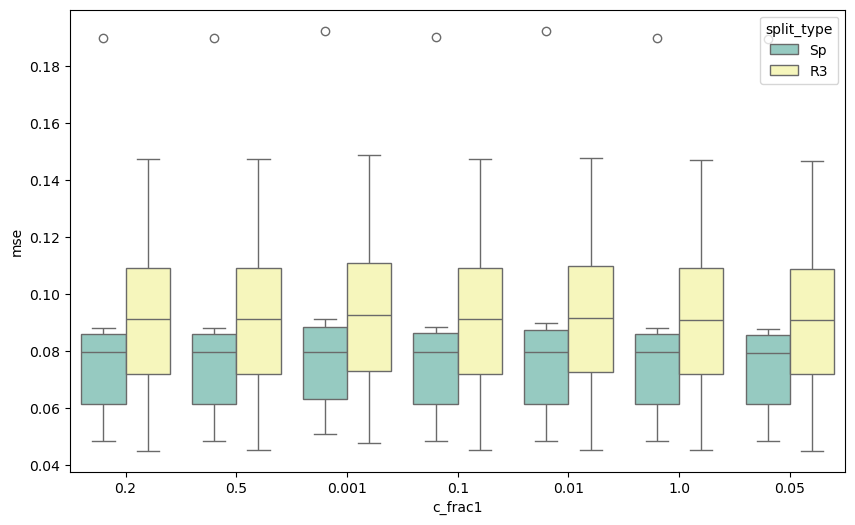

In [19]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

RW_val_df = val_df[val_df["analysis"] == "BV_bench"]

# RW_val_df = RW_val_df[RW_val_df["ensemble"] == "dirty"]


sns.boxplot(data=val_df, x="c_frac1", y="mse", hue="split_type", ax=ax, palette="Set3")#, order=method_order)

# ax.set_yscale("log")

plt.show()


In [20]:
dMSE_ensemble_pmf_df

,name,replicate,dMSE,dataset,system,system_name,calc_name,avg_H_opt,avg_H_opt_kj,avg_S_opt,...,Z_opt,likelihood_opt,likelihood_conf,quasi_likelihood,protein,method,fit,ensemble,c_frac1,split_type
0,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,1,-0.000633,test,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,test_HOIP_af_clean_sweep_0.001_1,7050.728235,7.050728,-328.372770,...,58.715125,0.996542,0.994342,0.996489,HOIP,bench,sweep,af_clean,0.001,R3
1,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,2,0.000055,test,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,test_HOIP_af_clean_sweep_0.001_2,7068.503808,7.068504,-319.103277,...,58.106467,0.995490,0.993197,0.995434,HOIP,bench,sweep,af_clean,0.001,R3
2,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,3,-0.000510,test,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.001_RW_bench_R3_k_sequen...,test_HOIP_af_clean_sweep_0.001_3,7044.200448,7.044200,-329.099995,...,58.793011,0.997510,0.996383,0.997478,HOIP,bench,sweep,af_clean,0.001,R3
3,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,1,-0.000225,test,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,test_HOIP_af_clean_sweep_0.001_1,7064.831047,7.064831,-317.686572,...,58.032940,0.995411,0.992593,0.995348,HOIP,bench,sweep,af_clean,0.001,Sp
4,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,2,-0.000242,test,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,test_HOIP_af_clean_sweep_0.001_2,7016.791418,7.016791,-339.606081,...,59.495781,0.997644,0.996540,0.997615,HOIP,bench,sweep,af_clean,0.001,Sp
5,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,3,-0.000380,test,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,HOIP_af_clean_sweep_0.001_RW_bench_Sp_res_neig...,test_HOIP_af_clean_sweep_0.001_3,7073.516856,7.073517,-313.574483,...,57.749263,0.995702,0.992936,0.995645,HOIP,bench,sweep,af_clean,0.001,Sp
6,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,1,-0.001585,test,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence_1,test_HOIP_af_clean_sweep_0.01_1,6991.117325,6.991117,-329.362740,...,59.019493,0.995127,0.992487,0.995060,HOIP,bench,sweep,af_clean,0.01,R3
7,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,2,-0.001858,test,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence_2,test_HOIP_af_clean_sweep_0.01_2,7010.132898,7.010133,-327.142769,...,58.846498,0.993481,0.989897,0.993395,HOIP,bench,sweep,af_clean,0.01,R3
8,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,3,-0.001587,test,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence,HOIP_af_clean_sweep_0.01_RW_bench_R3_k_sequence_3,test_HOIP_af_clean_sweep_0.01_3,6993.275560,6.993276,-328.672325,...,58.982846,0.995013,0.992328,0.994950,HOIP,bench,sweep,af_clean,0.01,R3
9,HOIP_af_clean_sweep_0.01_RW_bench_Sp_res_neigh...,1,-0.000687,test,HOIP_af_clean_sweep_0.01_RW_bench_Sp_res_neigh...,HOIP_af_clean_sweep_0.01_RW_bench_Sp_res_neigh...,test_HOIP_af_clean_sweep_0.01_1,7020.713286,7.020713,-326.054029,...,58.749741,0.991247,0.987120,0.991134,HOIP,bench,sweep,af_clean,0.01,Sp


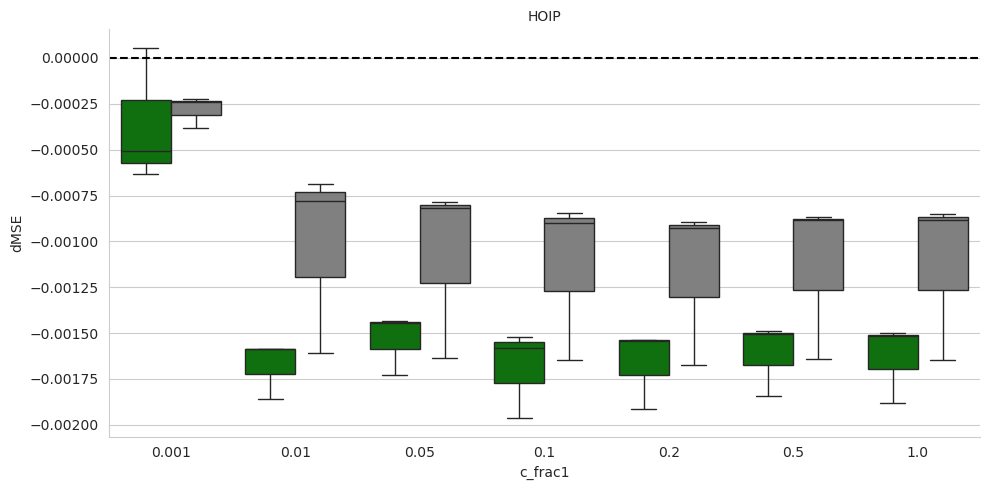

In [21]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=2, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="dMSE", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("dMSE")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Set style
# sns.set_style("whitegrid")

# # Assuming dataset_order is defined as in your code
# dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# # Filter the dataframe
# dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

# # Create FacetGrid
# g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
#                   sharey='row', sharex='row', row_order=["BPTI"])

# def plot_line_with_std(data, x, y, hue, **kwargs):
#     ax = plt.gca()
    
#     # Calculate mean and std for each group
#     stats = data.groupby([x, hue])[y].agg(['mean', 'std']).reset_index()
    
#     # Plot mean lines for each hue value
#     for hue_val in data[hue].unique():
#         stats_hue = stats[stats[hue] == hue_val]
#         color = "green" if hue_val == "R3" else "grey"
        
#         # Convert to numpy arrays for plotting
#         x_vals = stats_hue[x].to_numpy()
#         y_mean = stats_hue['mean'].to_numpy()
#         y_std = stats_hue['std'].to_numpy()
        
#         # Plot line
#         ax.plot(x_vals, y_mean, color=color, label=hue_val)
        
#         # Add std deviation band
#         ax.fill_between(x_vals,
#                        y_mean - y_std,
#                        y_mean + y_std,
#                        alpha=0.2, color=color)
    
#     ax.legend()

# # Map the line plot to the FacetGrid
# g.map_dataframe(plot_line_with_std, "c_frac1", "dMSE", "split_type")

# # Customize the plot
# g.set_titles(row_template="{row_name}")
# g.set_ylabels("dMSE")

# # Add horizontal line at y=0
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# plt.show()

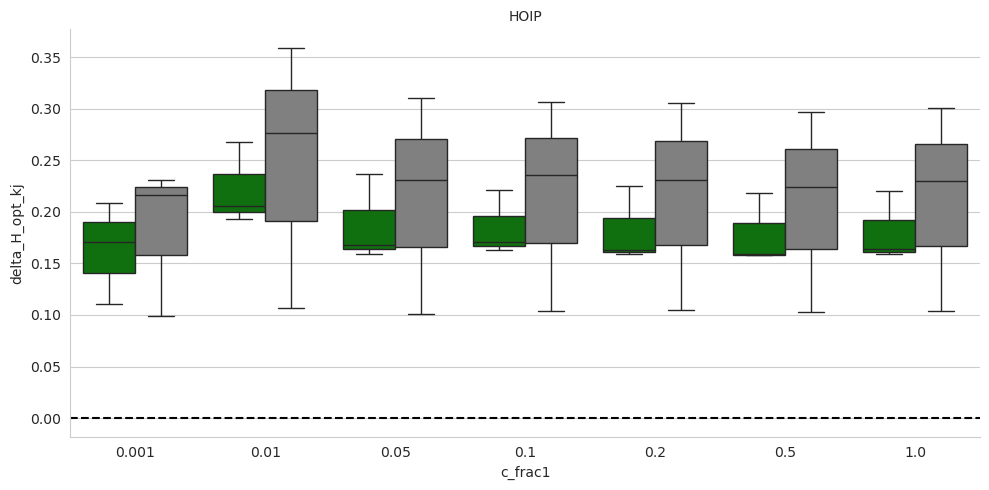

In [23]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=2, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="delta_H_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("delta_H_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

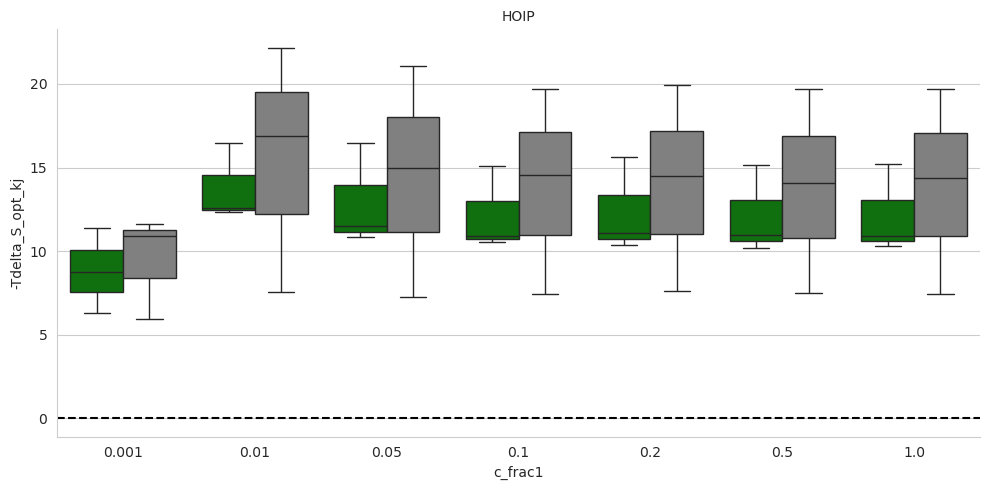

In [24]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=2, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="-Tdelta_S_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("-Tdelta_S_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

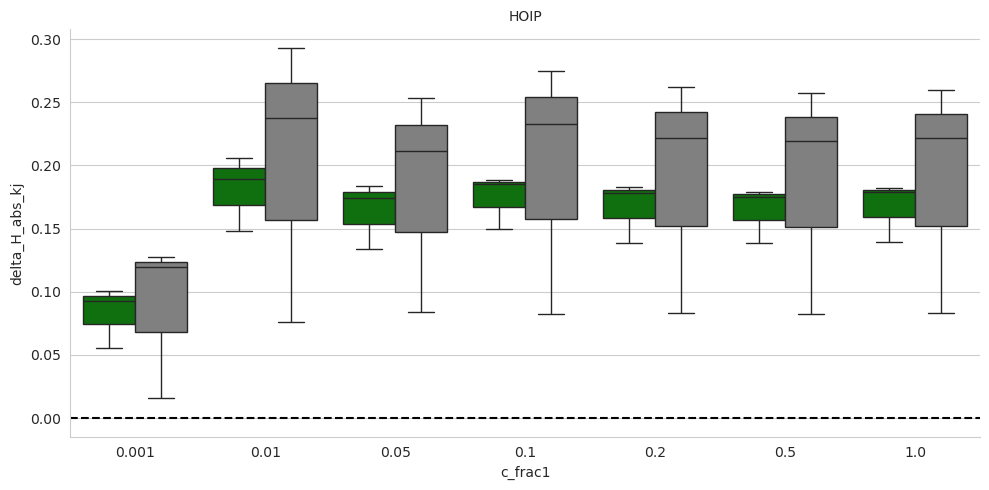

In [25]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=2, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="delta_H_abs_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("delta_H_abs_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

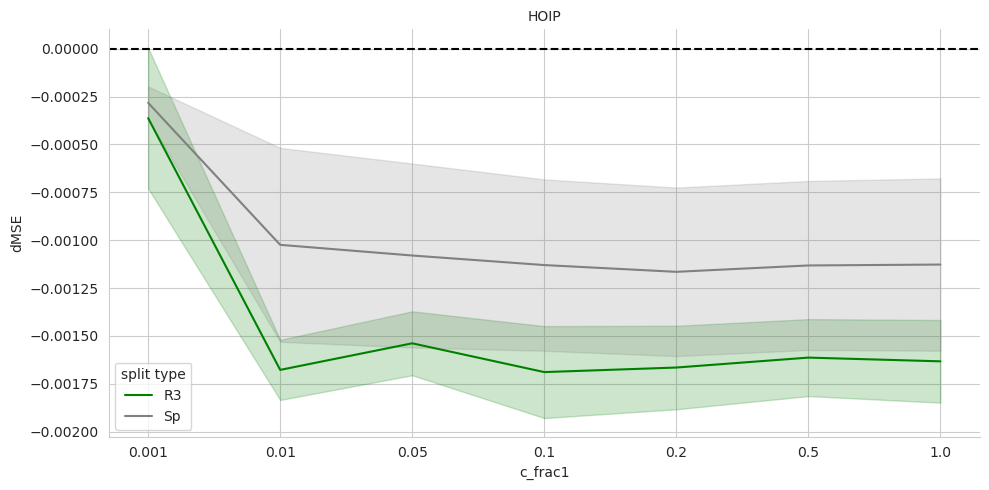

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
                  sharey='row', sharex='row', row_order=["HOIP"])
g.map_dataframe(plot_mean_std, "c_frac1", "dMSE")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("dMSE")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

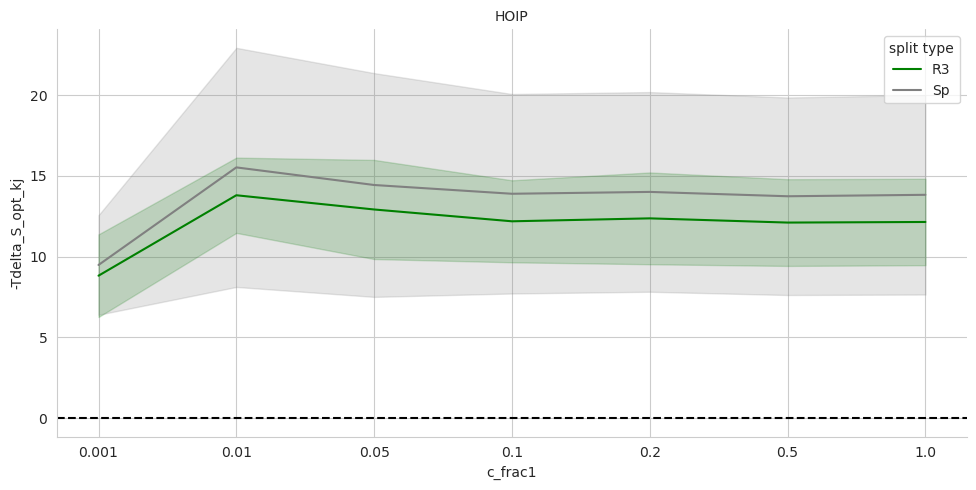

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
                  sharey='row', sharex='row', row_order=["HOIP"])
g.map_dataframe(plot_mean_std, "c_frac1", "-Tdelta_S_opt_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("-Tdelta_S_opt_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

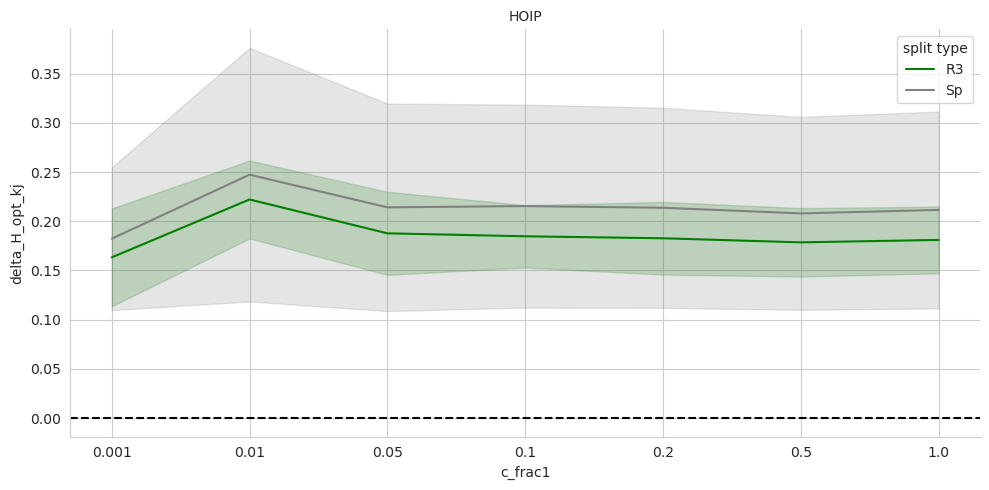

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
                  sharey='row', sharex='row', row_order=["HOIP"])
g.map_dataframe(plot_mean_std, "c_frac1", "delta_H_opt_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("delta_H_opt_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

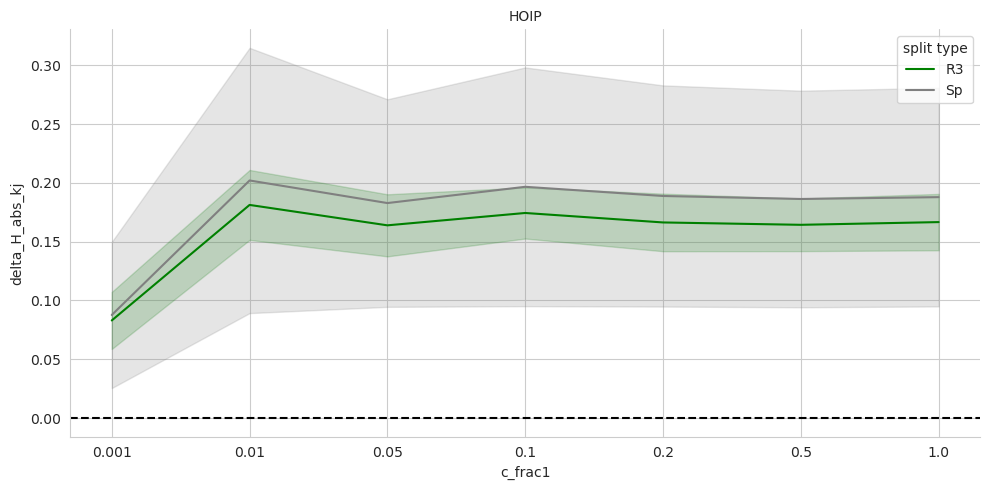

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
                  sharey='row', sharex='row', row_order=["HOIP"])
g.map_dataframe(plot_mean_std, "c_frac1", "delta_H_abs_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("delta_H_abs_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(RW_val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="method", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 750x0 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))
# R3_val_df = R3_val_df[R3_val_df["ensemble"] == "dirty"]
# Create the FacetGrid
g = sns.FacetGrid(R3_val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="split_type", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

NameError: name 'R3_val_df' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)#, col_order=protein_names)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="split_type", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

BV_constants_df = pkl_list["BV_constants"]
# remove constants which are default
default_Bc = 0.35
default_Bh = 2.0
BV_constants_df = BV_constants_df[(BV_constants_df["Bc"] != default_Bc) & (BV_constants_df["Bh"] != default_Bh)]

# Set up a FacetGrid to create a grid of scatter plots
g = sns.FacetGrid(BV_constants_df, col="protein", col_wrap=1, height=4, aspect=1.5)#, col_order=protein_names)
g.map_dataframe(sns.scatterplot, x='Bc', y='Bh', hue='c_frac1', alpha=0.7)

# Draw the _BV constants lines on each subplot
_Bc = 0.35
_Bh = 2.0

# Define a helper function to draw lines across facets
def add_lines(**kwargs):
    plt.axvline(x=_Bc, color='grey', linestyle='--')
    plt.axhline(y=_Bh, color='grey', linestyle='--')

g.map(add_lines)

# Adjust the axes limits uniformly
g.set(xlim=(0, 0.7))

# Additional customizations
g.add_legend(title='Fit')  # Add a legend to the plot with a title
g.set_axis_labels("Bc", "Bh")  # Set axis labels
g.set_titles("Protein: {col_name}")  # Set titles for subplots

# Optional: Adjust the layout and title
plt.subplots_adjust(top=0.95)  # Adjust subplots to provide space for the title
g.fig.suptitle('BV Constants by Protein')  # Set a super title for the grid

plt.yscale('log')

# Show the plot
plt.show()